### Header

In [6]:
# import libraries

# maths
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# modelling
from sklearn import linear_model
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline

# nlp
#from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from nltk.stem import PorterStemmer,WordNetLemmatizer
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import spacy
#from spacy.tokens import Doc

# web
#import requests
#import json

# others
import os
import re
import time
import datetime as datetime

In [3]:
# file paths

input_path = '../data/2_input/'
clean_path = '../data/3_clean/'
output_path = '../data/4_output/'

image_path = '../images/'

### Functions

### Import Data

In [7]:
# import clean data

df_train = pd.read_csv(clean_path + 'train_clean.csv')
df_test = pd.read_csv(clean_path + 'test_clean.csv')
street_map = gpd.read_file('../data/2_input/Chicago Boundaries/geo_export_d41dc94d-31ce-478c-902c-864695385885.shp')
#df_weather = pd.read_csv(clean_path + 'weather_clean.csv')
#df_spray = pd.read_csv(clean_path + 'spray_clean.csv')

### EDA

In [8]:
crs = {'init': 'epsg:4326'}
df_train.head()

,Unnamed: 0,species,block,street,trap,nummosquitos,wnvpresent,year,month,day,latitude,longitude
0,0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,1,0,2007,5,29,41,-87
1,1,CULEX RESTUANS,41,N OAK PARK AVE,T002,1,0,2007,5,29,41,-87
2,2,CULEX RESTUANS,62,N MANDELL AVE,T007,1,0,2007,5,29,41,-87
3,3,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,1,0,2007,5,29,41,-87
4,4,CULEX RESTUANS,79,W FOSTER AVE,T015,4,0,2007,5,29,41,-87


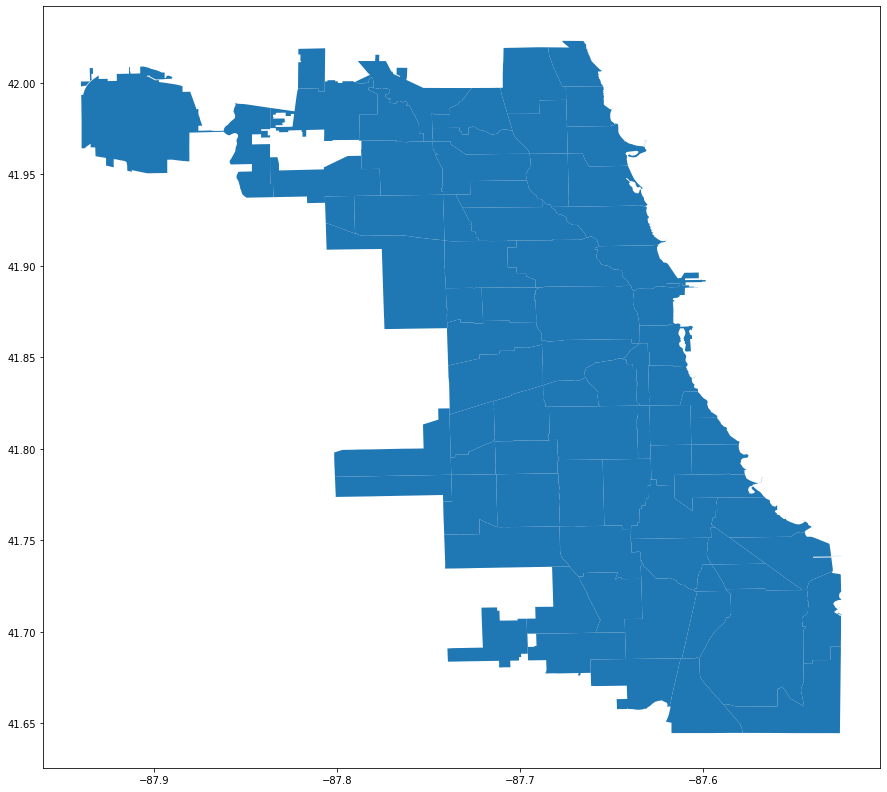

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [16]:
geometry = [Point(xy) for xy in zip(df_train['longitude'], df_train['latitude'])]
geometry[:3]

In [18]:
geo_df = gpd.GeoDataFrame(df_train,
                      crs=crs,
                      geometry=geometry)
geo_df

,Unnamed: 0,species,block,street,trap,nummosquitos,wnvpresent,year,month,day,latitude,longitude,geometry
0,0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,1,0,2007,5,29,41,-87,POINT (-87 41)
1,1,CULEX RESTUANS,41,N OAK PARK AVE,T002,1,0,2007,5,29,41,-87,POINT (-87 41)
2,2,CULEX RESTUANS,62,N MANDELL AVE,T007,1,0,2007,5,29,41,-87,POINT (-87 41)
3,3,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,1,0,2007,5,29,41,-87,POINT (-87 41)
4,4,CULEX RESTUANS,79,W FOSTER AVE,T015,4,0,2007,5,29,41,-87,POINT (-87 41)
5,5,CULEX RESTUANS,15,W WEBSTER AVE,T045,2,0,2007,5,29,41,-87,POINT (-87 41)
6,6,CULEX RESTUANS,25,W GRAND AVE,T046,1,0,2007,5,29,41,-87,POINT (-87 41)
7,7,CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,1,0,2007,5,29,41,-87,POINT (-87 41)
8,8,CULEX RESTUANS,11,W ROOSEVELT,T048,2,0,2007,5,29,41,-87,POINT (-87 41)
9,9,CULEX RESTUANS,11,W CHICAGO,T049,1,0,2007,5,29,41,-87,POINT (-87 41)


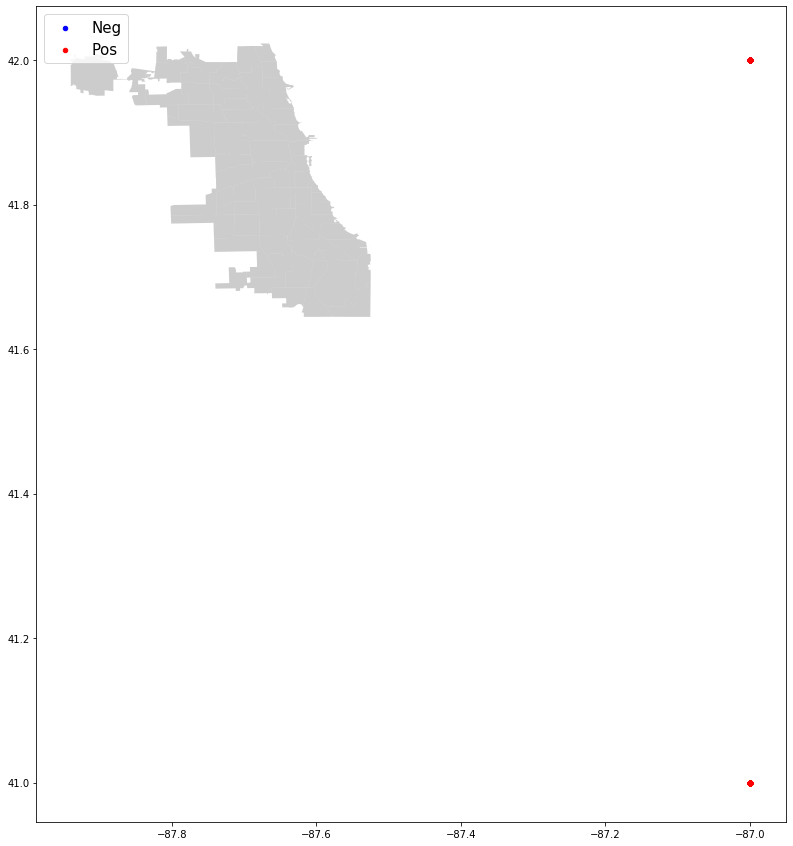

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue', marker='o', label='Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red', marker='o', label='Pos')
plt.legend(prop={'size': 15})